In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#linear regression algoritmasını çağırıyoruz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#train test split veriyi ikiye ayırır biriyle eğitiyor biriyle test eder
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')

In [4]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
180,181,-1,toyota starlet,gas,std,four,sedan,rwd,front,104.5,187.8,66.5,54.1,3131,dohc,six,171,mpfi,3.27,3.35,9.20,156,5200,20,24,15690.0
132,133,3,saab 99e,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250,21,28,11850.0
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,four,110,1bbl,3.15,3.58,9.00,86,5800,27,33,9095.0
53,54,1,mazda rx-4,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.00,68,5000,31,38,6695.0
153,154,0,toyota corona hardtop,gas,std,four,wagon,fwd,front,95.7,169.7,63.6,59.1,2280,ohc,four,92,2bbl,3.05,3.03,9.00,62,4800,31,37,6918.0


In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [9]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [10]:
df.shape

(205, 26)

In [11]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [13]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [14]:
df['CarName'].nunique()

147

In [15]:
df['CarName'].value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

In [16]:
df['CarName'].value_counts(normalize=True)#normalize=True dediğimizde %de olarak gösterir

toyota corona           0.029268
toyota corolla          0.029268
peugeot 504             0.029268
subaru dl               0.019512
mitsubishi mirage g4    0.014634
                          ...   
mazda glc 4             0.004878
mazda rx2 coupe         0.004878
maxda glc deluxe        0.004878
maxda rx3               0.004878
volvo 246               0.004878
Name: CarName, Length: 147, dtype: float64

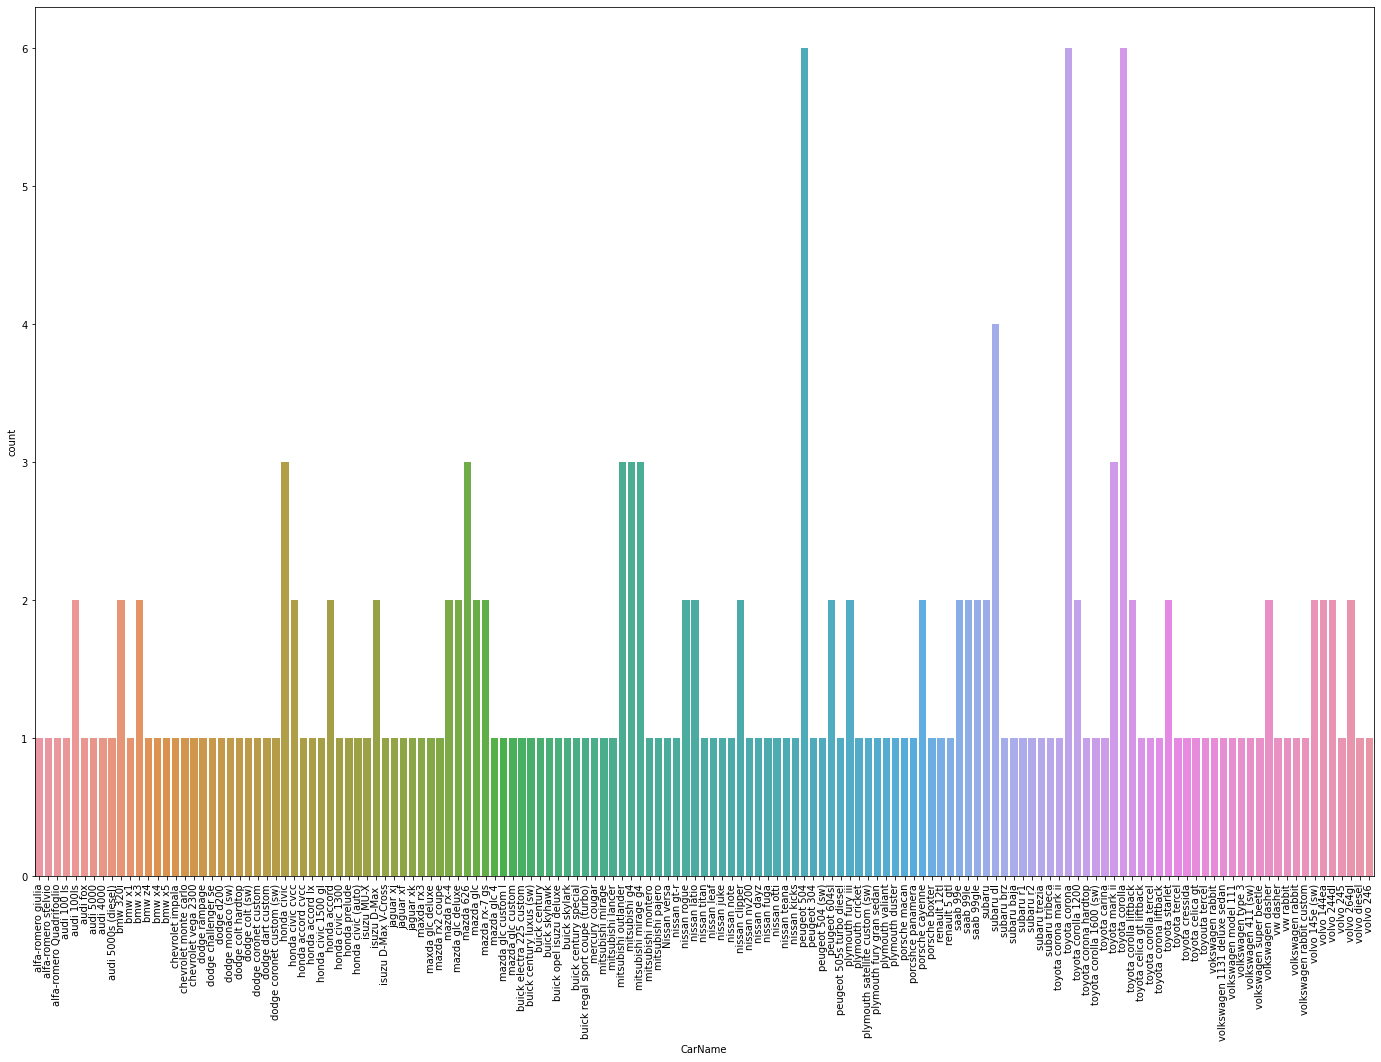

In [17]:
plt.figure(figsize=(24,16))
sns.countplot(x=df['CarName'])
plt.xticks(rotation=90);

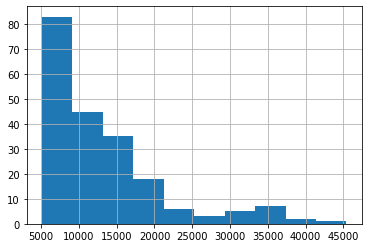

In [18]:
df['price'].hist() #arabanın kilometre dağılımını gösterir.

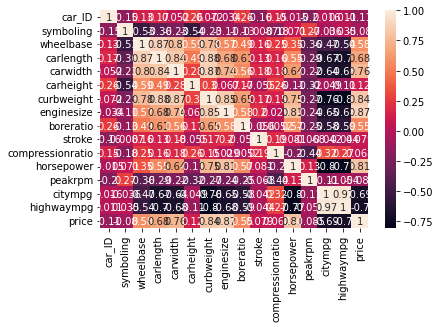

In [19]:
sns.heatmap(df.corr(), annot=True); #hangi sütunun hangi sütuna nasıl bağlı olduğunu gösterir

In [20]:
abs(df.corr()['price']).sort_values(ascending=False)
#korelasyonu büyükten küçüğe sıralar.

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
highwaympg          0.697599
citympg             0.685751
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
car_ID              0.109093
peakrpm             0.085267
symboling           0.079978
stroke              0.079443
compressionratio    0.067984
Name: price, dtype: float64

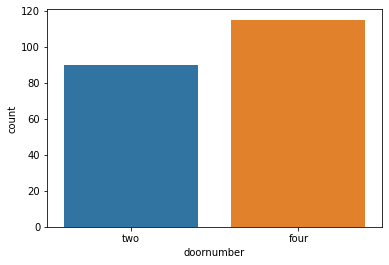

In [21]:
sns.countplot(x=df['doornumber']);

## Modelling

In [22]:
x=df.drop(['price'],axis=1)
# modeli kurarken x'in hangi sütunları kapsadığını belirliyoruz.

In [23]:
x.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [24]:
y=df[['price']]

In [25]:
x=pd.get_dummies(x,drop_first=True)#

In [26]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)
#x ve y'yi alıp eğitmek ve test etmek için ikiye böler.
#%80 eğitim için ayırıyoruz ,%20'yi teste ayırıyoruz.
#random her seferinde farklı seçiyor.
#random_state aynı verileri seçiyor böylelikle eğitip test etmek kolaylaşıyor
#seed=rakamları yeniden çalıştırdığımızda yine ayrı verileri seçer.

In [28]:
x_train.shape, x_test.shape#boyutuna bakar.
#164 tanesini eğitiyor.
#41 tanesini test ediyor.

((164, 190), (41, 190))

In [29]:
x_train

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,...,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,67,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,72,4200,31,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
111,112,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,95,5000,19,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
153,154,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,62,4800,31,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
96,97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,69,5200,31,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
38,39,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,86,5800,27,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
14,15,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,

In [30]:
lr=LinearRegression()

In [31]:
model=lr.fit(x_train,y_train) #makineye öğrettik

In [32]:
tahmin=lr.predict(x_test) #test verilerini verip y_test'i tahmin ettirdik.
#test için ayırdığımız verinin sonuçlarını tahmin eder.

In [33]:
#r2 nekadar 1'e yakınsa başrı oranı okadar iyidir.

In [34]:
(mean_squared_error(tahmin,y_test))**.5
#tahmin ettiğimiz değer ile gerçek değeri karşılaştır ve karekökünü al

13295.11552645148

In [35]:
r2_score(tahmin,y_test)

-0.1961479583283079

In [36]:
x=df[['CarName','fueltype','doornumber','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]

In [37]:
x.head()

,CarName,fueltype,doornumber,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,alfa-romero giulia,gas,two,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,alfa-romero stelvio,gas,two,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero Quadrifoglio,gas,two,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,audi 100 ls,gas,four,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,audi 100ls,gas,four,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [38]:
# yazıdan rakama çevirmek için
x=pd.get_dummies(x,drop_first=True)
#drop_first=True -> Birinci sütunu siler
#sparse matrix-> çoğunluğu sıfır olan matrixlere denir.
#get_dummies 0 ve 1 yapar.

In [39]:
x

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,...,CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_gas,doornumber_two,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,130,3.47,2.68,9.0,111,5000,21,27,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,130,3.47,2.68,9.0,111,5000,21,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,152,2.68,3.47,9.0,154,5000,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,109,3.19,3.40,10.0,102,5500,24,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,136,3.19,3.40,8.0,115,5500,18,22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,141,3.78,3.15,9.5,114,5400,23,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,141,3.78,3.15,8.7,160,5300,19,25,0,0,0,0,0,0,0,0,0,0,0

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=42)
#data değiştiğii için train_test_split tekrarladık.

In [41]:
model=lr.fit(x_train,y_train) #makineye öğrettik

In [42]:
tahmin=lr.predict(x_test) #test verilerini verip y_test'i tahmin ettirdik.

In [43]:
(mean_squared_error(tahmin,y_test))**.5

6197.751087129431

In [44]:
r2_score(tahmin,y_test)

0.44957925414821664

In [45]:
#Regression için başka modellere de bakmanız gerekir.

In [46]:
from sklearn.linear_model import Ridge,Lasso
#Ridge,=hatanın karesini alıyor hatayı 0'a çekmeye çalışıyor.
#Lasso=hatanın mutlak değerini alarak hatayı azaltmaya çalışıyor.

In [47]:
R=Ridge()
L=Lasso()

In [48]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [49]:
(mean_squared_error(tahmin2,y_test))**.5 #hatayı hesaplıyoruz.

3243.5711666145417

In [50]:
r2_score(tahmin2,y_test)

0.8537516420182893

In [51]:
L.fit(x_train,y_train)
tahmin3=L.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.610e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


In [52]:
(mean_squared_error(tahmin3,y_test))**.5
#**.5=karesini almak.
# .5 = 0.5
#hata oranını verir.

3899.630055099312

In [53]:
r2_score(tahmin3,y_test)#başarı oranını verir.

0.7615882345522162

In [54]:
#toplam 3 farklı kaynaktan tahmin ettirdik(başaryı doğruladık).

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
E=ElasticNet(l1_ratio=0.8)

In [57]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [58]:
tahmin4=E.predict(x_test)

In [59]:
r2_score(tahmin4,y_test)

0.796314366411393